In [265]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [266]:
df=pd.read_csv('/Users/_senyonjo/Downloads/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [267]:
df.isna().any(axis=0)

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [268]:
df.corr()['Class']

Time     -0.012323
V1       -0.101347
V2        0.091289
V3       -0.192961
V4        0.133447
V5       -0.094974
V6       -0.043643
V7       -0.187257
V8        0.019875
V9       -0.097733
V10      -0.216883
V11       0.154876
V12      -0.260593
V13      -0.004570
V14      -0.302544
V15      -0.004223
V16      -0.196539
V17      -0.326481
V18      -0.111485
V19       0.034783
V20       0.020090
V21       0.040413
V22       0.000805
V23      -0.002685
V24      -0.007221
V25       0.003308
V26       0.004455
V27       0.017580
V28       0.009536
Amount    0.005632
Class     1.000000
Name: Class, dtype: float64

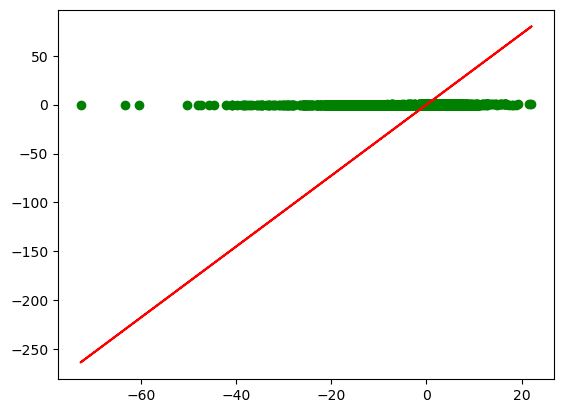

In [269]:
import matplotlib.pyplot as plt
import numpy as np
#for the first variable
plt.plot(df['V2'],df['Class'],'o',color='green')
#obtain the m(slope) and b (intercept)
m,b=np.polyfit(df['Class'],df['V2'],1)

#ploting 
plt.plot(df['V2'],m*df['V2']+b,color='red')

In [270]:
from sklearn.model_selection import train_test_split
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [271]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [272]:
#since we have an unblanaced datasset we get to balance it up
X=df[df['Class']==0]
Y=df[df['Class']==1]

In [273]:
print(X.shape,Y.shape)

(284315, 31) (492, 31)


In [274]:
Xtest=X.sample(n=492)
Xtest.shape

(492, 31)

In [275]:
newdatset=pd.concat([Xtest,Y])
newdatset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
173080,121351.0,1.906021,-0.324441,-2.136075,-0.000509,1.245114,1.079314,0.060941,0.277962,0.443566,...,0.389931,1.350487,-0.077617,-0.680949,0.348005,0.123535,-0.001254,-0.087614,23.67,0
176905,122961.0,1.113635,-2.791458,-1.697466,-0.906067,-0.488461,1.755923,-0.690178,0.458686,-0.049750,...,0.577710,0.586640,-0.211343,-0.937363,-0.534956,-0.143397,-0.060701,0.011609,502.00,0
227876,145267.0,-1.542500,0.891290,-0.041299,-0.832998,-0.761724,0.496172,-0.026336,0.892589,0.163015,...,-0.029615,-0.397462,0.141969,0.222334,-0.124060,-0.670495,-0.679346,-0.148319,118.49,0
123634,77005.0,1.160957,1.265621,-1.576473,1.472988,1.162173,-1.013532,0.658133,-0.152624,-0.847326,...,-0.120365,-0.204997,-0.203189,-0.282172,0.785278,-0.284958,0.058399,0.085436,1.79,0
267060,162595.0,-1.874653,0.180255,-1.213951,-1.060911,1.770518,-1.618443,1.739758,-0.678300,0.294404,...,-0.153109,1.082919,0.513453,-0.274543,0.082026,0.129685,0.773313,0.109587,33.72,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [276]:
#now we get to split our data frame for for predictions
X=newdatset.drop(columns=['Class'])
Y=newdatset['Class']


X_train,X_test,Y_train,Y_test=train_test_split(X,Y,stratify=Y,test_size=0.2,random_state=2)


In [277]:
model=LogisticRegression()

In [278]:
model.fit(X_train,Y_train)

LogisticRegression()

Time has an importance of -2.9362925950448902e-05
V1 has an importance of 0.14188122066205286
V2 has an importance of -0.16364551080186654
V3 has an importance of -0.5896203778586702
V4 has an importance of 0.6355621606900383
V5 has an importance of 0.3135768130982461
V6 has an importance of -0.2999675892256679
V7 has an importance of -0.25040929442817883
V8 has an importance of -0.1676358888869029
V9 has an importance of -0.3284386877513392
V10 has an importance of -0.49911636374615903
V11 has an importance of 0.11278493895747897
V12 has an importance of -0.38712166622718547
V13 has an importance of -0.1848031085626738
V14 has an importance of -0.8785013126396928
V15 has an importance of -0.16647783846544048
V16 has an importance of -0.2334350312939477
V17 has an importance of -0.3616428992756283
V18 has an importance of -0.021628627382609823
V19 has an importance of -0.03346097199423607
V20 has an importance of 0.1734171887344329
V21 has an importance of 0.08816321077160053
V22 has a

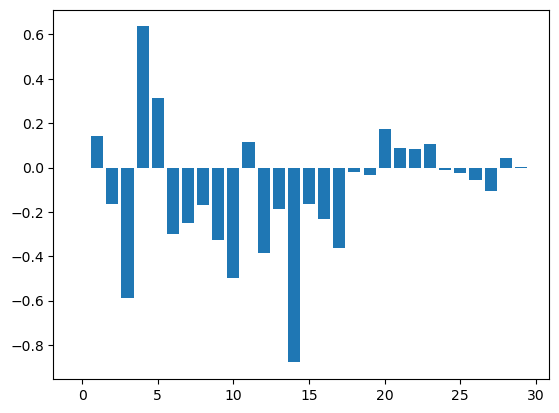

In [279]:
datacol=[]
fimport=[]
# for i,columns in enumerate(newdatset.drop(['Class'],axis=1)):
#     print('the feature: {} has an importance: {}\n'.format(columns,model.feature_importances_[i]))

importance=model.coef_[0]

for i,column in enumerate(newdatset.drop(columns=['Class'])):
    print('{} has an importance of {}'.format(column,importance[i]))




    datacol.append(column)
    fimport.append(importance[i])


import matplotlib.pyplot as plt
plt.bar([a for a in range(len(importance))],importance)
plt.xlabel='columns'
plt.ylabel='importance'
plt.show()

In [280]:
datacol

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

In [281]:
fimportdf=zip(datacol,fimport)
fimportdf=pd.DataFrame(fimportdf,columns=['Feature','Feature_importance'])
fimportdf.sort_values(by=['Feature_importance'],ascending=False)

,Feature,Feature_importance
4,V4,0.635562
5,V5,0.313577
20,V20,0.173417
1,V1,0.141881
11,V11,0.112785
23,V23,0.105005
21,V21,0.088163
22,V22,0.081251
28,V28,0.044878
29,Amount,0.002086


In [282]:
model.predict(X_train)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,

In [283]:
from sklearn.metrics import accuracy_score
ascore =accuracy_score(Y_train,model.predict(X_train))
print('Accuracy score for thr train:',ascore)

print('[[====confusion matrix for the train====]]')
print(confusion_matrix(Y_train,model.predict(X_train)))

print('[[====classification report for the train====]]')
print(classification_report(Y_train,model.predict(X_train)))

Accuracy score for thr train: 0.9453621346886912
[[====confusion matrix for the train====]]
[[382  11]
 [ 32 362]]
[[====classification report for the train====]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       393
           1       0.97      0.92      0.94       394

    accuracy                           0.95       787
   macro avg       0.95      0.95      0.95       787
weighted avg       0.95      0.95      0.95       787



In [284]:
#PREDICTING THE TESTSET
model.predict(X_test)

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0])

In [285]:
ascore =accuracy_score(Y_test,model.predict(X_test))
print('Accuracy score for the test:',ascore)

print('[[====confusion matrix for the test====]]')
print(confusion_matrix(Y_test,model.predict(X_test)))

print('[[====classification report for the test====]]')
print(classification_report(Y_test,model.predict(X_test)))

Accuracy score for the test: 0.9137055837563451
[[====confusion matrix for the test====]]
[[94  5]
 [12 86]]
[[====classification report for the test====]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        99
           1       0.95      0.88      0.91        98

    accuracy                           0.91       197
   macro avg       0.92      0.91      0.91       197
weighted avg       0.92      0.91      0.91       197



In [286]:
#misclassifiaction rate (error rate)

error=(97+12)/(97+2+12+86)
error

0.5532994923857868

In [287]:
#precision
precision=97/(97+2)
precision

0.9797979797979798

In [288]:
# recall
recall=97/(97+12)
recall

0.8899082568807339

In [289]:
#classification accuracy
caccuracy=(97+2)/(97+2+12+86)
caccuracy


0.5025380710659898

In [290]:
#using the random forest 
from sklearn.ensemble import RandomForestClassifier

forest=RandomForestClassifier(criterion='gini',n_estimators=5,random_state=2,n_jobs=2)

forest.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=5, n_jobs=2, random_state=2)

In [291]:
forest.predict(X_train)

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,

In [292]:
accu=accuracy_score(Y_train,forest.predict(X_train))
print('Random forest train accuarcy',accu)


print('[[+++++ confusion matrix  for random train++++]]')
print(confusion_matrix(Y_train,forest.predict(X_train)))

print('[++++ classification report for the forest train ++++]')
print(classification_report(Y_train,forest.predict(X_train)))

Random forest train accuarcy 0.9822109275730623
[[+++++ confusion matrix  for random train++++]]
[[388   5]
 [  9 385]]
[++++ classification report for the forest train ++++]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       393
           1       0.99      0.98      0.98       394

    accuracy                           0.98       787
   macro avg       0.98      0.98      0.98       787
weighted avg       0.98      0.98      0.98       787



In [293]:
#fir the test set 
forest.predict(X_test)

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0])

In [294]:
#details on the prediction
accu=accuracy_score(Y_test,forest.predict(X_test))
print('the accuracy score for R/forest test:',accu)

print('[+++confusion matrix++]')
print (confusion_matrix(Y_test,forest.predict(X_test)))


print('+++classification report+++')
print(classification_report(Y_test ,forest.predict(X_test)))

the accuracy score for R/forest test: 0.8984771573604061
[+++confusion matrix++]
[[91  8]
 [12 86]]
+++classification report+++
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        99
           1       0.91      0.88      0.90        98

    accuracy                           0.90       197
   macro avg       0.90      0.90      0.90       197
weighted avg       0.90      0.90      0.90       197



In [296]:
from imblearn.over_sampling import SMOTE
SMOTE.predict_proba(newdatset)

AttributeError: type object 'SMOTE' has no attribute 'predict_proba'

In [ ]:
# using the xg boost
from xgboost import XGBClassifier
model = XGBClassifier()


In [ ]:
model.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
model.predit(X_test)

AttributeError: 'XGBClassifier' object has no attribute 'predit'

In [ ]:
from imblearn.over_sampling import SMOTE


In [ ]:
SMOTE.m